## Imports

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from tqdm import tqdm
tqdm.pandas()

import astropy.units as u
from astropy.cosmology import FlatLambdaCDM
from astropy.coordinates import SkyCoord

## Calculating Seperations

In [2]:
folder = 'C:/Users/oryan/Documents/mergers-in-cosmos'
data_folder = f'{folder}/data'
results_folder = f'{folder}/results'

In [3]:
df = pd.read_csv(f'{data_folder}/catalogue-matched-cosmos-2020.csv', index_col = 0)

In [4]:
df.head()

,SourceID,ID_1,ALPHA_J2000_1,DELTA_J2000_1,X_IMAGE_1,Y_IMAGE_1,ERRX2_IMAGE_1,ERRY2_IMAGE_1,ERRXY_IMAGE_1,FLUX_RADIUS_1,...,ez_ssfr_p025_2,ez_ssfr_p160_2,ez_ssfr_p500_2,ez_ssfr_p840_2,ez_ssfr_p975_2,ez_Av_p025_2,ez_Av_p160_2,ez_Av_p500_2,ez_Av_p840_2,ez_Av_p975_2
0,4000705532984,857121.0,150.673667,2.226291,9348.870117,22451.160156,0.000002,0.000004,1.265998e-08,8.876858,...,-8.385987,-8.323476,-8.259419,-8.171948,-8.081048,0.595371,0.783795,0.924471,1.022045,1.076083
1,4000705533312,873195.0,150.668102,2.242849,9482.499023,22848.505859,0.000007,0.000002,1.829277e-06,5.542504,...,-8.962106,-8.711401,-8.478580,-8.303174,-8.135300,0.082679,0.231435,0.436111,0.622873,0.829844
2,4000705533383,861738.0,150.645118,2.237538,10033.689453,22720.843750,0.000039,0.000078,1.332813e-05,5.169795,...,-9.779914,-9.521317,-9.042374,-8.946216,-8.919963,0.570974,0.686736,0.964232,1.396826,1.587413
3,4000705539435,1280765.0,149.702469,2.636086,32637.894531,32285.564453,0.000561,0.000900,1.408110e-05,4.764572,...,-10.821019,-10.378546,-10.191748,-10.048404,-9.860973,0.251250,0.657133,1.055286,1.348915,1.713512
4,4000705539529,1284864.0,149.686223,2.637412,33027.406250,32317.517578,0.000031,0.000030,1.244353e-06,6.412690,...,-8.389942,-8.324630,-8.253101,-8.180449,-8.090549,0.360573,0.404528,0.450688,0.494164,0.550538


In [5]:
df_red = (
    df[['SourceID', 'ID_1', 'ID_2','ALPHA_J2000_1','DELTA_J2000_1','ALPHA_J2000_2','DELTA_J2000_2','lp_mass_best_1','lp_mass_best_2','ez_L2800_1','ez_L2800_2','ez_LIR_1','ez_LIR_2', 'ez_z_phot_1', 'ez_z_phot_2']]
)

In [6]:
df_dedup_prim = df_red.drop_duplicates('ID_1',keep='first')

In [7]:
df_dedup_sec = df_dedup_prim.drop_duplicates('ID_2', keep='first')

In [8]:
df_sfr_calc = (
    df_dedup_sec
    .assign(log_sfr_tot_1 = df_red.apply(lambda row: np.log10((3.234e-10 * row.ez_L2800_1) + (0.98e-10 * row.ez_LIR_1)) , axis = 1))
    .assign(log_sfr_tot_2 = df_red.apply(lambda row: np.log10((3.234e-10 * row.ez_L2800_2) + (0.98e-10 * row.ez_LIR_2)) , axis = 1))
    .drop(columns = ['ez_L2800_1','ez_L2800_2','ez_LIR_1','ez_LIR_2'])
)

In [9]:
df_sfr_calc

,SourceID,ID_1,ID_2,ALPHA_J2000_1,DELTA_J2000_1,ALPHA_J2000_2,DELTA_J2000_2,lp_mass_best_1,lp_mass_best_2,ez_z_phot_1,ez_z_phot_2,log_sfr_tot_1,log_sfr_tot_2
0,4000705532984,857121.0,841021.0,150.673667,2.226291,150.671079,2.220207,10.49288,7.10423,0.219858,0.217929,0.677594,-1.105446
1,4000705533312,873195.0,873475.0,150.668102,2.242849,150.670496,2.250141,10.18078,7.23538,0.346519,0.345261,0.593891,-1.860431
2,4000705533383,861738.0,865493.0,150.645118,2.237538,150.647252,2.239816,9.36051,9.70409,0.619803,0.607007,0.358019,0.991230
3,4000705539435,1280765.0,1282323.0,149.702469,2.636086,149.699833,2.638971,9.04580,8.46090,1.641619,1.635580,1.044336,-0.449644
4,4000705539529,1284864.0,1285369.0,149.686223,2.637412,149.691626,2.641429,10.17034,8.12822,0.705821,0.749673,0.938193,-0.059929
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3734,6000536185304,1298440.0,1294513.0,150.471752,2.648508,150.475000,2.649819,11.09239,8.18020,0.515377,0.487480,1.154015,-0.831089
3735,6000536185363,1299189.0,1290594.0,150.498992,2.652105,150.502094,2.645184,9.62219,7.76831,0.365685,0.372096,0.188956,-0.351831
3736,6000536185496,1308675.0,1301552.0,150.501162,2.663109,150.497406,2.657512,9.92693,8.89540,0.906057,0.914561,0.772577,-0.538174
3737,6000536185585,1317966.0,1315336.0,150.487598,2.671303,150.490389,2.671429,9.92713,8.49561,0.689826,0.678499,1.073661,-0.023034


<AxesSubplot:xlabel='lp_mass_best_1', ylabel='log_sfr_tot_1'>

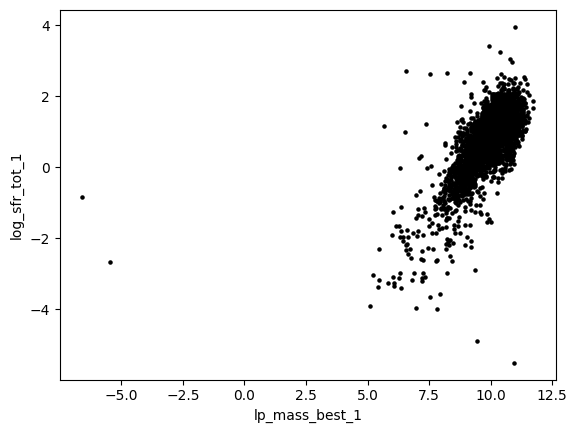

In [10]:
df_sfr_calc.plot.scatter(
    x = 'lp_mass_best_1',
    y = 'log_sfr_tot_1',
    s = 5,
    color='black'
)

In [11]:
df_sfr_calc = (
    df_sfr_calc.query('lp_mass_best_1 > 5.5 and lp_mass_best_2 > 5.5 and lp_mass_best_1 < 15 and lp_mass_best_2 < 15')
)

In [12]:
df_z_cut = df_sfr_calc#.query('ez_z_phot_1 < 0.5')

In [13]:
df_z_cut

,SourceID,ID_1,ID_2,ALPHA_J2000_1,DELTA_J2000_1,ALPHA_J2000_2,DELTA_J2000_2,lp_mass_best_1,lp_mass_best_2,ez_z_phot_1,ez_z_phot_2,log_sfr_tot_1,log_sfr_tot_2
0,4000705532984,857121.0,841021.0,150.673667,2.226291,150.671079,2.220207,10.49288,7.10423,0.219858,0.217929,0.677594,-1.105446
1,4000705533312,873195.0,873475.0,150.668102,2.242849,150.670496,2.250141,10.18078,7.23538,0.346519,0.345261,0.593891,-1.860431
2,4000705533383,861738.0,865493.0,150.645118,2.237538,150.647252,2.239816,9.36051,9.70409,0.619803,0.607007,0.358019,0.991230
3,4000705539435,1280765.0,1282323.0,149.702469,2.636086,149.699833,2.638971,9.04580,8.46090,1.641619,1.635580,1.044336,-0.449644
4,4000705539529,1284864.0,1285369.0,149.686223,2.637412,149.691626,2.641429,10.17034,8.12822,0.705821,0.749673,0.938193,-0.059929
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3734,6000536185304,1298440.0,1294513.0,150.471752,2.648508,150.475000,2.649819,11.09239,8.18020,0.515377,0.487480,1.154015,-0.831089
3735,6000536185363,1299189.0,1290594.0,150.498992,2.652105,150.502094,2.645184,9.62219,7.76831,0.365685,0.372096,0.188956,-0.351831
3736,6000536185496,1308675.0,1301552.0,150.501162,2.663109,150.497406,2.657512,9.92693,8.89540,0.906057,0.914561,0.772577,-0.538174
3737,6000536185585,1317966.0,1315336.0,150.487598,2.671303,150.490389,2.671429,9.92713,8.49561,0.689826,0.678499,1.073661,-0.023034


<AxesSubplot:xlabel='ez_z_phot_1', ylabel='ez_z_phot_2'>

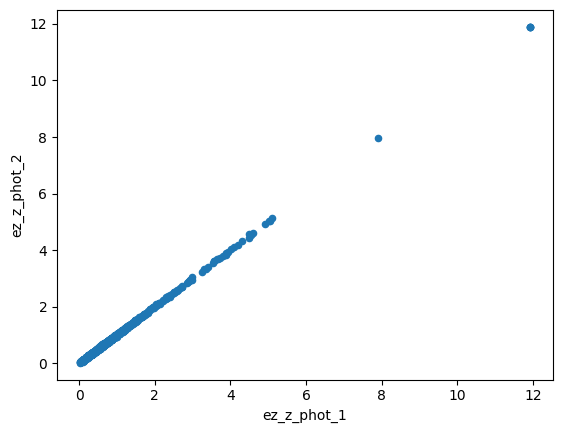

In [14]:
df_z_cut.plot.scatter(
    x = 'ez_z_phot_1',
    y = 'ez_z_phot_2',
)

In [15]:
df_tmp = df_z_cut.assign(z_diff = df_z_cut.apply(lambda row: abs(row.ez_z_phot_1 - row.ez_z_phot_2), axis = 1))

In [16]:
df_tmp_red = df_tmp.query('z_diff < 0.05')

In [17]:
def calc_sep(ra1, ra2, dec1, dec2, z_1, z_2, cosmo):
    d1 = cosmo.comoving_distance(z_1).to(u.kpc)
    d2 = cosmo.comoving_distance(z_1).to(u.kpc)
    
    c1 = SkyCoord(ra = ra1 * u.deg, dec = dec1 * u.deg, frame = 'fk5')
    c2 = SkyCoord(ra = ra2 * u.deg, dec = dec2 * u.deg, frame = 'fk5')
    
    ang_sep = c1.separation(c2).to(u.arcmin)
    conversion = cosmo.kpc_proper_per_arcmin(z_1)
    
    c1 = SkyCoord(ra = ra1 * u.deg, dec = dec1 * u.deg, distance = d1, frame = 'fk5')
    c2 = SkyCoord(ra = ra2 * u.deg, dec = dec2 * u.deg, distance = d2, frame = 'fk5')
    
    # sep = c1.separation(c2)
    
    proj_sep = ang_sep * conversion
    
    return float(proj_sep.to(u.kpc) / u.kpc)

In [18]:
cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Tcmb0=2.725)

In [19]:
df_proj_seps = (
    df_tmp_red
    .assign(proj_sep = df_tmp_red.progress_apply(lambda row: calc_sep(row.ALPHA_J2000_1, row.ALPHA_J2000_2, row.DELTA_J2000_1, row.DELTA_J2000_2, row.DELTA_J2000_1, row.DELTA_J2000_2, cosmo), axis = 1))
)

100%|██████████| 3421/3421 [00:19<00:00, 175.01it/s]


In [20]:
df_proj_seps.proj_sep.max()

446.72252257526975

In [21]:
df_proj_seps_red = df_proj_seps.query('proj_sep <= 500')

In [22]:
df_proj_seps_red

,SourceID,ID_1,ID_2,ALPHA_J2000_1,DELTA_J2000_1,ALPHA_J2000_2,DELTA_J2000_2,lp_mass_best_1,lp_mass_best_2,ez_z_phot_1,ez_z_phot_2,log_sfr_tot_1,log_sfr_tot_2,z_diff,proj_sep
0,4000705532984,857121.0,841021.0,150.673667,2.226291,150.671079,2.220207,10.49288,7.10423,0.219858,0.217929,0.677594,-1.105446,0.001929,196.341492
1,4000705533312,873195.0,873475.0,150.668102,2.242849,150.670496,2.250141,10.18078,7.23538,0.346519,0.345261,0.593891,-1.860431,0.001258,227.620556
2,4000705533383,861738.0,865493.0,150.645118,2.237538,150.647252,2.239816,9.36051,9.70409,0.619803,0.607007,0.358019,0.991230,0.012797,92.567029
3,4000705539435,1280765.0,1282323.0,149.702469,2.636086,149.699833,2.638971,9.04580,8.46090,1.641619,1.635580,1.044336,-0.449644,0.006039,112.127967
4,4000705539529,1284864.0,1285369.0,149.686223,2.637412,149.691626,2.641429,10.17034,8.12822,0.705821,0.749673,0.938193,-0.059929,0.043852,193.103445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3734,6000536185304,1298440.0,1294513.0,150.471752,2.648508,150.475000,2.649819,11.09239,8.18020,0.515377,0.487480,1.154015,-0.831089,0.027897,100.357071
3735,6000536185363,1299189.0,1290594.0,150.498992,2.652105,150.502094,2.645184,9.62219,7.76831,0.365685,0.372096,0.188956,-0.351831,0.006411,217.351526
3736,6000536185496,1308675.0,1301552.0,150.501162,2.663109,150.497406,2.657512,9.92693,8.89540,0.906057,0.914561,0.772577,-0.538174,0.008504,192.956785
3737,6000536185585,1317966.0,1315336.0,150.487598,2.671303,150.490389,2.671429,9.92713,8.49561,0.689826,0.678499,1.073661,-0.023034,0.011327,79.847247


In [23]:
df_proj_seps_red.proj_sep.max()

446.72252257526975

## Plotting Relations

In [24]:
def calc_sfr_tot(logx1, logx2):
    x1 = 10**logx1
    x2 = 10**logx2
    x_tot = x1 + x2
    return np.log10(x_tot)

In [25]:
def calc_ssfr(logm, logsfr):
    m = 10**logm
    sfr = 10**logsfr
    
    ssfr = sfr / m
    return ssfr

In [26]:
df_seps_tot = df_proj_seps_red.assign(sfr_tot = df_proj_seps_red.apply(lambda row: calc_sfr_tot(row.log_sfr_tot_1, row.log_sfr_tot_2), axis = 1))

In [27]:
df_seps_ssfr = (
    df_seps_tot
    .assign(ssfr_1 = df_seps_tot.apply(lambda row: calc_ssfr(row.lp_mass_best_1, row.log_sfr_tot_1), axis = 1))
    .assign(ssfr_2 = df_seps_tot.apply(lambda row: calc_ssfr(row.lp_mass_best_2, row.log_sfr_tot_2), axis = 1))
)

In [28]:
df_seps_ssfr.query('ssfr_1 > 0.00001')

,SourceID,ID_1,ID_2,ALPHA_J2000_1,DELTA_J2000_1,ALPHA_J2000_2,DELTA_J2000_2,lp_mass_best_1,lp_mass_best_2,ez_z_phot_1,ez_z_phot_2,log_sfr_tot_1,log_sfr_tot_2,z_diff,proj_sep,sfr_tot,ssfr_1,ssfr_2
323,4000755600515,1449062.0,1442880.0,150.263857,2.801636,150.262301,2.795693,7.55208,9.37911,2.872940,2.859255,2.635257,1.320149,0.013685,173.662739,2.655787,0.000012,8.730504e-09
1032,4000880269747,678218.0,674272.0,150.410233,2.066357,150.415589,2.067201,5.67163,8.13180,0.736990,0.718139,1.175045,-0.801844,0.018851,162.648025,1.179601,0.000032,1.165081e-09
2906,4001273784791,219624.0,218950.0,150.607911,1.620551,150.603775,1.622000,6.56785,9.67133,2.713746,2.721504,2.714166,1.183395,0.007758,133.601558,2.726775,0.000140,3.251358e-09


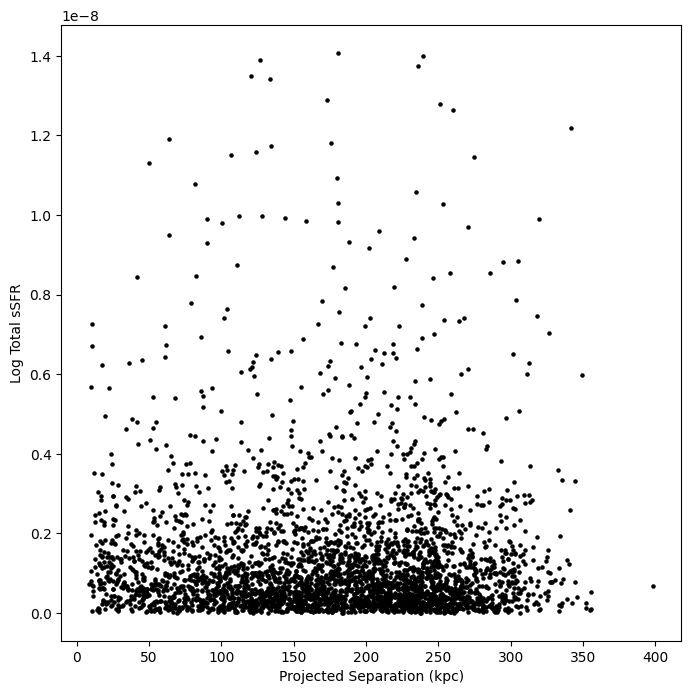

In [29]:
df_seps_ssfr.query('ssfr_1 < 0.000000015').plot.scatter(
    x = 'proj_sep',
    y = 'ssfr_1',
    s = 5,
    color='black',
    ylabel = 'Log Total sSFR',
    xlabel = 'Projected Separation (kpc)',
    figsize = (8,8)
)
plt.show()

In [30]:
nbins = 9
x = np.linspace(0,125, nbins)
bins = np.zeros([nbins])
bins_N = np.zeros([nbins])

In [31]:
df_tmp = df_seps_ssfr.query('ssfr_1 < 0.000000015')

## Use a rolling average below! Don't bin in a direct average like this!

In [32]:
for i in range(1,len(x)):
    x0 = x[i-1]
    x1 = x[i]
    
    df_seps_tmp = df_tmp.query('proj_sep <= @x1 and proj_sep > @x0')
    if len(df_seps_tmp) < 5:
        bins[i-1] = np.nan
        continue
    bins[i] = (df_seps_tmp.ssfr_1.sum() + df_seps_tmp.ssfr_2.sum()) / (2*len(df_seps_tmp))
    bins_N[i-1] = 2*len(df_seps_tmp) 

In [33]:
bins_N

array([ 58., 218., 192., 218., 254., 262., 312., 338.,   0.])

In [34]:
len(x[1:])

8

In [35]:
len(bins[:-1])

8

In [36]:
x

array([  0.   ,  15.625,  31.25 ,  46.875,  62.5  ,  78.125,  93.75 ,
       109.375, 125.   ])

In [37]:
bins

array([0.00000000e+00, 1.99998181e-09, 1.97060077e-09, 1.25084266e-09,
       1.58850854e-09, 1.47237531e-09, 1.87641764e-09, 1.57824175e-09,
       2.10768238e-09])

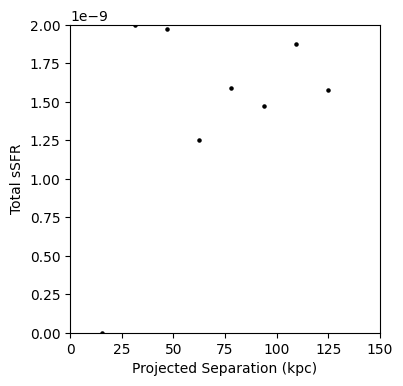

In [38]:
plt.figure(figsize = (4,4))
plt.scatter(x[1:], bins[:-1], s = 5, color = 'black')
plt.xlabel('Projected Separation (kpc)')
plt.ylabel('Total sSFR')
plt.xlim([0,150])
plt.ylim([0,2e-9])
plt.show()